In [2]:
import pandas as pd
import numpy as np
import os

In [14]:
ingresync_recipe = pd.read_csv('/opt/ml/Recipe_Project/Recipe_datasets/recipe_data_final.csv')

# 기본 정보 확인

In [3]:
ingresync_recipe

,recipeid,title,cook,quantity,time,level,ingredients,ingredient_quantity,process,view
0,6912734,버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,새송이버섯간장버터구이,1인분,15분 이내,아무나,"['새송이버섯', '버터', '어린잎채소', '간장', '맛술', '올리고당']","['2개', '30g', '', '1T', '1T', '1/2T']","['버섯의 밑동과 갓을 잘라낸 뒤, 3~4등분 한다', '자른버섯의 양면에 칼집을 ...",324000
1,6843136,달콤 짭조름♡ 떡 베이컨 간장조림♡,떡베이컨간장조림,3인분,5분 이내,아무나,"['베이컨', '대파', '떡', '간장', '참기름', '물엿', '기름']","['', '', '', '', '', '', '']","['대파에 떡국떡 (가래떡, 떡볶이떡) 베이컨', '기름두르고 볶듯구워요.(튀기듯하...",196000
2,7002443,쫄깃한 식감과 버터의 풍미가 느껴지는 닭고기스테이크,닭고기스테이크,2인분,30분 이내,아무나,"['닭다리살 정육', '소금', '후추', '바질가루', '버터', '올리브유', ...","['300g', '약간', '약간', '약간', '1숟가락', '3숟가락', '',...","['닭다리살은 소금, 후추, 바질가루를 뿌려 재료 준비하는 동안 재워요.', '감자...",1152
3,6996297,고구마떡 고구마씨를 말릴 수 있는 위험한 레시피,고구마떡,2인분,20분 이내,아무나,"['고구마', '설탕', '감자전분', '모짜렐라치즈', '식용유']","['1개', '5큰술', '3큰술', '적당량', '3큰술']",['고구마 1개 10~15분간 뚜껑을 닫고\n찜기에 쪄주세요 \n(찬물에 처음부터 ...,5102
4,6885909,【간단반찬】꽈리고추 햄볶음 만들기~,꽈리고추햄볶음,3인분,10분 이내,아무나,"['꽈리고추', '햄', '양파', '진간장', '굴소스', '마늘', '올리고당'...","['20개', '140g', '1/2개', '2T', '1/2T', '3쪽', '2...","['꽈리고추(20개)는 먹기좋게 3등분해서 썰어 주시구요~', '햄(140g)도 썰...",164000
...,...,...,...,...,...,...,...,...,...,...
120824,7004885,초간단 간식 편스토랑레시피 최귀화 말린도토리묵튀김 건조묵튀김,건조묵튀김,2인분,15분 이내,초급,"['말린 도토리묵', '볶은 콩가루', '꿀', '식용유']","['120g', '3스푼', '3스푼', '약간']","['재료 준비해 주세요~', '180도 예열한 기름에 건조 도토리묵을 넣고 튀겨 주...",43
120825,7004887,어묵국 만드는법 시원한 어묵국물 끓이는법 오뎅국 레시피 사각 어묵 요리 충무김밥 단짝,어묵국,4인분,30분 이내,아무나,"['사각 어묵', '무', '물', '국간장', '참치액', '소금', '대파', ...","['1봉지', '300g', '1.8L', '2T', '1T', '1T', '', ...","['육수팩을 준비합니다. 다시백에 다시마, 디포리(밴댕이), 무, 멸치, 생강, 대...",69
120826,7004898,상큼한 오징어오이초무침으로 여름반찬 끝!,오징어오이초무침,2인분,15분 이내,아무나,"['오징어', '오이', '대파', '당근', '통깨', '고춧가루 숟가락', '설...","['1마리', '1개', '1/2줄기', '1/3개', '약간', '6g', '6g...","['오징어는 안쪽에 칼집모양을 낸 뒤 먹기 좋은 크기로 잘라요.', '오이는 반으로...",182
120827,7004906,"식단관리에 좋은 저탄고지, 야채돌돌삼겹야채찜",삼겹야채찜,2인분,90분 이내,초급,"['대패삼겹살', '당근', '부추', '팽이버섯', '유자청', '다진마늘', '...","['300g', '1/2', '100g', '1개', '4T', '2T', '1T'...","['대패 삼겹살은 한 줄 씩 펴서 후추와 소금으로 밑간을 해주세요', '당근, 부추...",95


In [20]:
ingresync_recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157856 entries, 0 to 157855
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   recipeid             157856 non-null  int64 
 1   userid               157856 non-null  object
 2   title                157856 non-null  object
 3   cook                 157856 non-null  object
 4   view                 157856 non-null  int64 
 5   quantity             157856 non-null  object
 6   time                 157856 non-null  object
 7   level                157856 non-null  object
 8   ingredients          157856 non-null  object
 9   ingredient_quantity  157856 non-null  object
 10  process              157856 non-null  object
dtypes: int64(2), object(9)
memory usage: 13.2+ MB


# RecipeID 중복 확인

In [21]:
#Recipe ID 고유 값 확인
ingresync_recipe['recipeid'].nunique()

121182

In [22]:
#RUser ID 고유 값 확인
ingresync_recipe['userid'].nunique()

4838

In [23]:
#중복되는 값들이 존재함.
ingresync_recipe.groupby('recipeid').count()

,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
recipeid,,,,,,,,,,
128671,1,1,1,1,1,1,1,1,1,1
131871,1,1,1,1,1,1,1,1,1,1
153040,1,1,1,1,1,1,1,1,1,1
221094,1,1,1,1,1,1,1,1,1,1
221097,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
7005054,1,1,1,1,1,1,1,1,1,1
7005055,1,1,1,1,1,1,1,1,1,1
7005056,1,1,1,1,1,1,1,1,1,1


In [24]:
#중복되는 값들 발견.
ingresync_recipe.groupby('recipeid').count()[ingresync_recipe.groupby('recipeid').count()['userid']!=1]

,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
recipeid,,,,,,,,,,
221102,3,3,3,3,3,3,3,3,3,3
349740,2,2,2,2,2,2,2,2,2,2
352415,2,2,2,2,2,2,2,2,2,2
357068,2,2,2,2,2,2,2,2,2,2
369105,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
7005013,2,2,2,2,2,2,2,2,2,2
7005015,2,2,2,2,2,2,2,2,2,2
7005019,2,2,2,2,2,2,2,2,2,2


In [25]:
#확인 결과 조회수 차이로 인해 RecipeID 중복이 발생.
ingresync_recipe[ingresync_recipe['recipeid']==221102]

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
90496,221102,skfo0701,참치 깻잎 주먹밥,참치깻잎주먹밥,31378,2인분,60분 이내,초급,"['밥', '깻잎', '참치 작은캔', '당근', '조미 김', '다진 마늘', '...","['2공기', '10장', '1개', '1/2개', '10장', '1/4t개', '...",['깻잎은 한장한장 깨끗이 씻어서 포갠 후에 한번 채 썰어주신 다음에 잘게 다져주세...
104879,221102,skfo0701,참치 깻잎 주먹밥,참치깻잎주먹밥,31379,2인분,60분 이내,초급,"['밥', '깻잎', '참치 작은캔', '당근', '조미 김', '다진 마늘', '...","['2공기', '10장', '1개', '1/2개', '10장', '1/4t개', '...",['깻잎은 한장한장 깨끗이 씻어서 포갠 후에 한번 채 썰어주신 다음에 잘게 다져주세...
105370,221102,skfo0701,참치 깻잎 주먹밥,참치깻잎주먹밥,31379,2인분,60분 이내,초급,"['밥', '깻잎', '참치 작은캔', '당근', '조미 김', '다진 마늘', '...","['2공기', '10장', '1개', '1/2개', '10장', '1/4t개', '...",['깻잎은 한장한장 깨끗이 씻어서 포갠 후에 한번 채 썰어주신 다음에 잘게 다져주세...


# cook 데이터 이름 조사

In [26]:
ingresync_recipe['cook'].nunique()

35621

In [27]:
def count_non_matching_strings(A, B):
    count = 0
    for i in range(len(A)):
        # A와 B의 공백 제거
        a = A[i].replace(" ", "")
        b = B[i].replace(" ", "")
        
        # B 문자열이 A 문자열에 포함되어 있는지 확인
        if b not in a:
            count += 1
    
    return count

# 예시 입력
A = ingresync_recipe['title'].tolist()
B = ingresync_recipe['cook'].tolist()

# 결과 계산
result = count_non_matching_strings(A, B)
print("음식 이름이 잘못 설정된 것 같은 레시피의 개수:", result)

음식 이름이 잘못 설정된 것 같은 레시피의 개수: 11787


In [28]:
def find_non_matching_strings(A, B):
    non_matching_indices = []
    for i in range(len(A)):
        # A와 B의 공백 제거
        a = A[i].replace(" ", "")
        b = B[i].replace(" ", "")
        
        # B 문자열이 A 문자열에 포함되어 있는지 확인
        if b not in a:
            non_matching_indices.append(i)
    
    return non_matching_indices

A = ingresync_recipe['title'].tolist()
B = ingresync_recipe['cook'].tolist()

result = find_non_matching_strings(A, B)
print("같지 않은 문자열의 인덱스:", result)

같지 않은 문자열의 인덱스: [114, 115, 123, 131, 140, 146, 148, 150, 153, 156, 164, 176, 187, 191, 213, 231, 238, 242, 272, 289, 291, 309, 326, 345, 353, 368, 372, 392, 406, 425, 431, 468, 482, 483, 517, 534, 544, 554, 573, 588, 614, 624, 627, 642, 643, 649, 651, 666, 699, 714, 720, 733, 750, 758, 764, 769, 773, 790, 807, 815, 817, 831, 844, 878, 905, 906, 932, 933, 944, 948, 953, 962, 966, 992, 1007, 1016, 1036, 1048, 1067, 1080, 1092, 1123, 1133, 1141, 1149, 1168, 1171, 1174, 1178, 1198, 1206, 1212, 1240, 1244, 1302, 1308, 1324, 1366, 1383, 1395, 1398, 1402, 1403, 1414, 1425, 1432, 1435, 1449, 1451, 1460, 1468, 1485, 1495, 1496, 1508, 1537, 1540, 1551, 1566, 1581, 1606, 1621, 1656, 1661, 1666, 1667, 1687, 1688, 1692, 1702, 1716, 1717, 1757, 1771, 1787, 1792, 1810, 1814, 1838, 1840, 1847, 1859, 1876, 1891, 1906, 1910, 1912, 1921, 1929, 1942, 1957, 1958, 1963, 1994, 2013, 2019, 2034, 2035, 2063, 2065, 2066, 2083, 2095, 2105, 2118, 2129, 2186, 2187, 2199, 2203, 2208, 2210, 2234, 2236, 2247, 2260, 2

In [29]:
#확인해보니 코어 재료는 들어가는 것을 알 수 있음. 표현 방식의 차이 -> 크게 문제가 되지 않을 것.
ingresync_recipe.loc[result]

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
114,6994439,gdubu33,두부조림보다 부드러운 매콤 순두부 요리,순두부조림,5066,2인분,20분 이내,아무나,"['순두부', '표고버섯', '양파', '대파', '청양고추', '참기름', '통깨...","['1봉', '2개', '1/2개', '1/2대', '1개', '1숟가락', '약간...","['순두부는 1~2cm 두께로 썬다.', '표고버섯은 약 0.5cm 두께로 슬라이스..."
115,6912539,98924365,에어프라이어 소시지 피자,소시지구이,80513,2인분,10분 이내,아무나,"['후랑크 소시지', '피자치즈', '양파', '소금', '후춧가루', '케첩', ...","['4개', '', '1/4개', '', '약간', '', '', '']","['양파 1/4개는 굵게 다지고 소금 한두 꼬집+후춧가루 뿌려 밑간해요', '끓는 ..."
123,7001752,aeaelove,아이 반찬 콩나물 & 크래미 무침 - 아이들 콩나물과 친해져요.,콩나물크래미무침,1811,4인분,30분 이내,초급,"['콩나물', '크래미', '대파', '소금', '들기름', '깨소금']","['300g', '140g', '조금', '1/2수저', '1수저', '1수저']",['냄비에 깨끗이 씻은 콩나물과 물을 적당히 넣고 뚜껑을 덮고 삶아요. 냄비에 거품...
131,6909570,85160889,기름 없이 볶아 다이어트에 좋은 중국식 청경채 돼지볶음,청경채돼지고기볶음,62061,1인분,10분 이내,아무나,"['돼지 앞다리살', '청경채', '파프리카', '간장', '굴 소스', '올리고당...","['200g', '3포기', '1/2개', '2스푼', '1스푼', '2스푼', '...","['재료를 준비해주세요.', '돼지 앞다리살 200g', '잡채용 처럼 길게 썰어 ..."
140,6955413,14524851,메추리알은 곤약 하고 졸여야~ 맛있어용~ 쫀득쫀득 곤약이 일품~,메추리알곤약조림,27507,6인분 이상,20분 이내,아무나,"['메추리알', '곤약', '당근', '건표고', '대파', '물', '간장', '...","['300g', '300g', '50g', '5g', '40g', '300cc', ...",['계량스푼은 집에서 사용하는 8cc 정도의 밥숟가락입니다.\n곤약을 가로세로 2c...
...,...,...,...,...,...,...,...,...,...,...,...
157613,7003675,31046650,냉동보리굴비 비린내 안나게 찌는 법,냉동보리굴비찌는법,520,2인분,60분 이내,아무나,"['대파', '생강', '레몬즙', '청주', '쌀뜨물']","['3대', '1T', '약간', '약간', '300ml']","['내장까지 제거 한 후 쪄서 보관해두었던 보리굴비 두마리', '쌀뜨물에 청주와 생..."
157641,7003836,82190218,알배추 배추 겉절이만들기 겉절이 양념 만들기,알배추겉절이,1787,2인분,60분 이내,초급,"['알배기', '쪽파', '소금', '고춧가루', '마늘', '까나리액젓', '새우...","['1/4', '취향껏', '2큰술', '4큰술', '1큰술', '3큰술', '1/...",['배추가 좀 작은 편인데 1/4 정도 준비했고. 쪽파가 없으시다면 안 넣으셔도 상...
157657,7003908,14200689,고사리파스타 고사리간장파스타 들기름 듬~뿍 넣어 고소함 가득 비건파스타 간장파스타 ...,고사리들기름파스타,130,2인분,20분 이내,초급,"['파스타면', '데친 고사리', '다진마늘', '대파', '범일불 간장', '참치...","['100g', '50g', '1큰 술', '조금', '2큰 술', '1큰 술', ...","['고사리는 삶거나 불린 후 물기를 제거해요.삶은 고사리를 구매하면 편해요!', '..."
157769,7004525,58548725,초간단 후랑크소시지 샌드위치,후랑크소세지샌드위치,135,2인분,5분 이내,아무나,"['후랑크소시지', '식빵', '상추', '케찹', '머스터드']","['', '', '', '', '']","['집에 있는 소시지 준비해 주세요', '식빵 준비하시고', '칼집내서 앞뒤로 잘 ..."


# 조회수(view) EDA

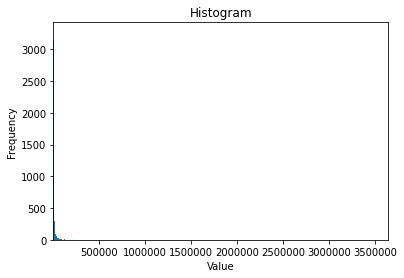

In [30]:
import matplotlib.pyplot as plt

#조회수에 대한 고찰.

# 주어진 리스트
data = ingresync_recipe['view'].tolist()

# 히스토그램 생성
plt.hist(data, bins=len(set(data)))

# 히스토그램 설정
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.ticklabel_format(style='plain', axis='x')
plt.xlim(1, max(data))



# 히스토그램 출력
plt.show()

In [31]:
#view 데이터에 숫자 외에 이상 값이 들어있는지 확인.

ingresync_recipe['view'] = ingresync_recipe['view'].astype(int)

count = 0
for index, value in enumerate(ingresync_recipe['view']):
    if not isinstance(value, (int)):
        print(f"이상한 값 발견: {value} (행: {index})")
        count += 1

print(f"이상한 값 개수: {count}")

#숫자 외에 존재하지 않음. -> 나중에 재료기반 추천할 때, view가 높은 것을 우선 추천하는 방향으로 해도 가능.

이상한 값 개수: 0


In [32]:
#들쑥 날쑥한 것을 확인할 수 있음. -> 평균이 13418인데 표준편차는 46046이고 최댓값이 3645173임.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
ingresync_recipe['view'].describe()

count    157856.00
mean      13418.92
std       46046.46
min          28.00
25%        1516.00
50%        3967.00
75%       10906.25
max     3645173.00
Name: view, dtype: float64

# quantity, time, level EDA

In [33]:
#이상 글자 확인.
ingresync_recipe['quantity'].unique()

array(['1인분', '3인분', '2인분', '4인분', '6인분 이상', '5인분', '4мЭЄлґД', '2мЭЄлґД',
       '3мқёл¶„', '2мқёл¶„', '2ì\x9džë¶\x84', '1ýŁŞŰÂä', '6žĚłŽ∂Ą žĚīžÉĀ',
       '6мқёл¶„ мқҙмғҒ', '2ì\x9dẁë¶\x84', '1мқёл¶„', '2ýŁŞŰÂä', '4мқёл¶„',
       '1žĚłŽ∂Ą', '2์\x9dธ๋ถ\x84', '1мЭЄлґД', '1Ïù∏Î∂Ñ', '2žĚłŽ∂Ą',
       '3ì\x9dẁë¶\x84', '3ýŁŞŰÂä', '4žĚłŽ∂Ą', '1ì\x9dẁë¶\x84',
       '3š\x9d¡ŠÑ\x84', '2ņØĖļČä', '6мЭЄлґД мЭімГБ', '1λùΗκΕ³', '5žĚłŽ∂Ą',
       '3мЭЄлґД', '5мқёл¶„', '2Ïù∏Î∂Ñ', '1ى\u200c¸ë¶„'], dtype=object)

In [34]:
X_Value = ['4мЭЄлґД', '2мЭЄлґД',
       '3мқёл¶„', '2мқёл¶„', '2ì\x9džë¶\x84', '1ýŁŞŰÂä', '6žĚłŽ∂Ą žĚīžÉĀ',
       '6мқёл¶„ мқҙмғҒ', '2ì\x9dẁë¶\x84', '1мқёл¶„', '2ýŁŞŰÂä', '4мқёл¶„',
       '1žĚłŽ∂Ą', '2์\x9dธ๋ถ\x84', '1мЭЄлґД', '1Ïù∏Î∂Ñ', '2žĚłŽ∂Ą',
       '3ì\x9dẁë¶\x84', '3ýŁŞŰÂä', '4žĚłŽ∂Ą', '1ì\x9dẁë¶\x84',
       '3š\x9d¡ŠÑ\x84', '2ņØĖļČä', '6мЭЄлґД мЭімГБ', '1λùΗκΕ³', '5žĚłŽ∂Ą',
       '3мЭЄлґД', '5мқёл¶„', '2Ïù∏Î∂Ñ', '1ى\u200c¸ë¶„']

ingresync_recipe[ingresync_recipe['quantity'].isin(X_Value)]  #이 값들은 모두 제거해야할 것.

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
6376,6862253,50151986,мМАл°ЬлІМлУ† нБђл¶ЉмєШм¶Ил®ЄнХА,нБђл¶ЉмєШм¶Ил®ЄнХА,2606,4мЭЄлґД,30лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '']","['150g', '25g', '90g', '2к∞Ь', '8g', '125g']",['мЭіл≤ИмЧРлКФ л™®лУ†мЮђл£Мл•Љ нХЄлУЬлЄФлЮЬлНФ...
7654,6864112,50151986,мВђк≥Љ лђімГЭм±Д лђімє®,мВђк≥ЉлђімГЭм±Длђімє®,54407,2мЭЄлґД,30лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '', '', '']","['1к∞Ь', '1/2к∞Ь', '2мК§нСЉ', '2мК§нСЉ', '1м°∞...","['мВђк≥ЉмЩА лђіл•Љ мЂСмЂС мН∞мЦім§АлЛ§.', 'мЦС..."
8795,6996855,50151986,мҳӨнҠёл°Җл°”лӮҳлӮҳл№ө л…ёл°Җк°ҖлЈЁ лӢӨмқҙм–ҙнҠ...,мҳӨнҠёл°Җл°”лӮҳлӮҳл№ө,1297,3мқёл¶„,60л¶„ мқҙлӮҙ,м•„л¬ҙлӮҳ,"['', '', '\xa0', '', '\xa0', ' ', '', ' ', '',...","['2к°ң', '2к°ң', '1к°ң', '1мҠӨн‘ј', '1мҠӨн‘ј',...",['лҶҚмқөмқҖ л°”лӮҳлӮҳ 2к°ң к»Қм§Ҳмқ„ лІ—кёҙ нӣ...
8808,6895914,50151986,лӢӨмқҙм–ҙнҠё мӢқлӢЁ - лёҢлЎңмҪңлҰ¬ мғҲмҡ° м•јм...,лёҢлЎңмҪңлҰ¬мғҲмҡ°м•јмұ„лі¶мқҢ,8355,2мқёл¶„,10л¶„ мқҙлӮҙ,м•„л¬ҙлӮҳ,"['', ' ', '', '', '', '', '', '', '', '\xa0']","['1/2к°ң', '1мӨҢ', '1/2к°ң', '1к°ң', '1мҲҹк°Җл...",['м•јмұ„л“Өмқ„ лЁ№мқ„ м–‘л§ҢнҒј мҶҗм§Ҳн•ңлӢӨ.'...
14633,6962945,50151986,м•Ңл°°м¶”м „,м•Ңл°°м¶”м „,4975,3мқёл¶„,30л¶„ мқҙлӮҙ,м•„л¬ҙлӮҳ,"[' ', '', ' ', ' ', '', '', '', '\xa0']","['11мһҘ', '1+1/2м»ө', '1+1/2м»ө', 'вҖӢ', '', '...",['м•Ңл°°м¶§мһҺмқ„ н•ңмһҘм”© лңҜм–ҙ к№ЁлҒ—н•ҳкІ...
...,...,...,...,...,...,...,...,...,...,...,...
155423,6984810,50151986,лПДнЖ†л¶ђ мГБмґФ лђµлђімє® мЦСлЕРмЮ• нЩ©кЄИ л†...,лПДнЖ†л¶ђлђµлђімє®,1177,1мЭЄлґД,10лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '', '', '', '', '', ' ', ...","['3мК§нСЉ', '2мК§нСЉ', '2мК§нСЉ', '1мК§нСЉ', '...",['лВ®мЭА лПДнЖ†л¶ђ 1/2нМ©мЭД кЇЉлВімЦі 3лУ±лґД...
155830,6981146,50151986,žóźžĖīŪĒĄŽĚľžĚīžĖīŽ°ú ŽįĒžā≠ŪēėÍ≥† Žß§žöī ŪõĄŽ...,Žß§žöīŪõĄŽĚľžĚīŽďúžĻėŪā®,1774,2žĚłŽ∂Ą,60Ž∂Ą žĚīŽāī,žēĄŽ¨īŽāė,"['', '', '', '', '', '', '']","['9Íįú', '', '', '', '', '', '']",['ŽÉČŽŹôžč§žóź žěąŽćė Žč≠Žč§Ž¶¨Ž•ľ Ž¨ľžóź ŽĄ£ž...
156501,6997092,50151986,мЦСл∞∞мґФнЖ†мК§нКЄлІМлУ§кЄ∞ мВђк≥ЉмЦСл∞∞мґФмГР...,мЦСл∞∞мґФнЖ†мК§нКЄ,957,1мЭЄлґД,15лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '', '', '', '', ' ', ' ',...","['1/4нЖµ', '1/4к∞Ь', '1/4к∞Ь', '1к∞Ь', 'м†БлЛє...",['мЦСл∞∞мґФлКФ м±ДмЖМ мДЄк≥ДмЭШ мЩХмЭілЭЉк≥† л...
157134,7000912,50151986,мҳӨмқҙм–‘л°°м¶”мӮ¬кіј мғҗлҹ¬л“ң мҳӨн”Ҳ нҶ мҠӨн...,мҳӨн”ҲнҶ мҠӨнҠё,447,2мқёл¶„,60л¶„ мқҙлӮҙ,мҙҲкёү,"['', '', '', ' ', '', '', '']","['1/4', '1/4', '1/2', '2мҠӨн‘ј', '', '2мҠӨн‘ј'...","['мӮ¬кіј 1/4 ,м–‘л°°м¶” 1/4, мҳӨмқҙ 1/2лҘј мӨҖ..."


In [35]:
ingresync_recipe['time'].unique()

array(['15분 이내', '5분 이내', '30분 이내', '20분 이내', '10분 이내', '2시간 이상',
       '60분 이내', '90분 이내', '120분 이내', '30лґД мЭілВі', '60л¶„ мқҙлӮҙ',
       '10л¶„ мқҙлӮҙ', '30л¶„ мқҙлӮҙ', '60ë¶\x84 ì\x9dŽë\x82Ž',
       '15л¶„ мқҙлӮҙ', '15лґД мЭілВі', '15ŰÂä ýŁ┤Űé┤', '15Ž∂Ą žĚīŽāī',
       '30ë¶\x84 ì\x9dṀë\x82Ṁ', '888분 이내', '60Ž∂Ą žĚīŽāī',
       '10๋ถ\x84 ์\x9dด๋\x82ด', '60лґД мЭілВі', '5Î∂Ñ Ïù¥ÎÇ¥',
       '5л¶„ мқҙлӮҙ', '10Ž∂Ą žĚīŽāī', '5ŰÂä ýŁ┤Űé┤', '30ŰÂä ýŁ┤Űé┤',
       '30Ž∂Ą žĚīŽāī', '2мӢңк°„ мқҙмғҒ', '15ë¶\x84 ì\x9dṀë\x82Ṁ',
       '15ŠÑ\x84 š\x9dÇŠ\x82Ç', '2žčúÍįĄ žĚīžÉĀ', '10лґД мЭілВі',
       '60ļČä ņØ┤ļé┤', '20л¶„ мқҙлӮҙ', '20лґД мЭілВі', '10κΕ³ λù¥κ²¥',
       '60ŰÂä ýŁ┤Űé┤', '30Î∂Ñ Ïù¥ÎÇ¥', '120л¶„ мқҙлӮҙ',
       '30ë¶„ ى\u200c´ë‚´'], dtype=object)

In [36]:
#888분 이내라는 이상한 값도 존재 -> 이상 값. 제거 요망.
ingresync_recipe[ingresync_recipe['time']=='888분 이내']

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
34272,6849487,cjcheiljedang,마늘바게트,마늘바게트,1407,2인분,888분 이내,고급,"['백설식빵믹스', '이스트', '물', '버터', '다진마늘', '건파슬리가루']","['1 봉', '1 봉', '215 g', '100 g', '1/2 작은술', ' ...","['제빵기에 식빵믹스와 이스트, 물을 넣어 반죽하고,', '반죽을 꺼내 랩을 씌워 ..."
92729,6849547,cjcheiljedang,블루베리잼 아몬드파이,블루베리잼아몬드파이,1773,2인분,888분 이내,고급,"['박력분', '아몬드파우더', '슈가파우더', '무염버터', '달걀', '블루베리...","['75 g', '15 g', '25 g', '85 g', '30 g', '200 ...","['밀가루, 아몬드 파우더, 슈거파우더는 체에 내리고 무염버터는 깍뚝 썰어 냉장 보..."
92737,6849648,cjcheiljedang,키위아이스크림,키위아이스크림,1425,2인분,888분 이내,중급,"['피부유산균', '플레인요거트', '골드키위', '백설스위트리알룰로스']","['1 봉', '200 g', '2 개', '50 g']","['각각의 재료를 준비한다.', '플레인 요거트, 듬성듬성 자른 골드키위, 피부유산..."
96995,6849547,cjcheiljedang,블루베리잼 아몬드파이,블루베리잼아몬드파이,1773,2인분,888분 이내,고급,"['박력분', '아몬드파우더', '슈가파우더', '무염버터', '달걀', '블루베리...","['75 g', '15 g', '25 g', '85 g', '30 g', '200 ...","['밀가루, 아몬드 파우더, 슈거파우더는 체에 내리고 무염버터는 깍뚝 썰어 냉장 보..."
97004,6849648,cjcheiljedang,키위아이스크림,키위아이스크림,1425,2인분,888분 이내,중급,"['피부유산균', '플레인요거트', '골드키위', '백설스위트리알룰로스']","['1 봉', '200 g', '2 개', '50 g']","['각각의 재료를 준비한다.', '플레인 요거트, 듬성듬성 자른 골드키위, 피부유산..."
101067,6848585,cjcheiljedang,딸기 바바루아 케이크,딸기케이크,1860,4인분,888분 이내,고급,"['스펀지케이크', '딸기', '생크림', '설탕', '판젤라틴', '우유', '장...","['1 개', '450 g', '350 ㎖', '80 g', '6 장', '50 ㎖...","['스펀지 케이크는 가로로 반 갈라 2등분한다.', '준비한 딸기 1/3은 과육이 ..."
136359,6849523,cjcheiljedang,포카치아 스테이크 샌드위치,포카치아스테이크샌드위치,703,2인분,888분 이내,중급,"['강력분', '드라이이스트', '우유', '백설이탈리안올리브유', '소금', '백...","['300 g', '1 작은술', '150 ㎖', ' 적당량', '1 작은술', '...",['우유를 45℃로 데운 다음 드라이이스트를 넣고 거품기로 저어준 다음 랩을 씌워 ...
137870,6849523,cjcheiljedang,포카치아 스테이크 샌드위치,포카치아스테이크샌드위치,703,2인분,888분 이내,중급,"['강력분', '드라이이스트', '우유', '백설이탈리안올리브유', '소금', '백...","['300 g', '1 작은술', '150 ㎖', ' 적당량', '1 작은술', '...",['우유를 45℃로 데운 다음 드라이이스트를 넣고 거품기로 저어준 다음 랩을 씌워 ...
139165,6869929,cjcheiljedang,토마토 요거트 빙수,토마토빙수,853,2인분,888분 이내,중급,"['투썸요거트파우더', '토마토', '우유', '방울토마토', '민트']","['3 큰술', '4 개', '2.5 컵', ' 약간', ' 약간']","['각각의 재료를 준비한다.', '토마토는 꼭지를 떼어내고 윗면에 십자모양의 칼집을..."
142556,6849523,cjcheiljedang,포카치아 스테이크 샌드위치,포카치아스테이크샌드위치,703,2인분,888분 이내,중급,"['강력분', '드라이이스트', '우유', '백설이탈리안올리브유', '소금', '백...","['300 g', '1 작은술', '150 ㎖', ' 적당량', '1 작은술', '...",['우유를 45℃로 데운 다음 드라이이스트를 넣고 거품기로 저어준 다음 랩을 씌워 ...


In [37]:
Y_Value=['30лґД мЭілВі', '60л¶„ мқҙлӮҙ',
       '10л¶„ мқҙлӮҙ', '30л¶„ мқҙлӮҙ', '60ë¶\x84 ì\x9dŽë\x82Ž',
       '15л¶„ мқҙлӮҙ', '15лґД мЭілВі', '15ŰÂä ýŁ┤Űé┤', '15Ž∂Ą žĚīŽāī',
       '30ë¶\x84 ì\x9dṀë\x82Ṁ', '888분 이내', '60Ž∂Ą žĚīŽāī',
       '10๋ถ\x84 ์\x9dด๋\x82ด', '60лґД мЭілВі', '5Î∂Ñ Ïù¥ÎÇ¥',
       '5л¶„ мқҙлӮҙ', '10Ž∂Ą žĚīŽāī', '5ŰÂä ýŁ┤Űé┤', '30ŰÂä ýŁ┤Űé┤',
       '30Ž∂Ą žĚīŽāī', '2мӢңк°„ мқҙмғҒ', '15ë¶\x84 ì\x9dṀë\x82Ṁ',
       '15ŠÑ\x84 š\x9dÇŠ\x82Ç', '2žčúÍįĄ žĚīžÉĀ', '10лґД мЭілВі',
       '60ļČä ņØ┤ļé┤', '20л¶„ мқҙлӮҙ', '20лґД мЭілВі', '10κΕ³ λù¥κ²¥',
       '60ŰÂä ýŁ┤Űé┤', '30Î∂Ñ Ïù¥ÎÇ¥', '120л¶„ мқҙлӮҙ',
       '30ë¶„ ى\u200c´ë‚´']

ingresync_recipe[ingresync_recipe['time'].isin(Y_Value)]

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
6376,6862253,50151986,мМАл°ЬлІМлУ† нБђл¶ЉмєШм¶Ил®ЄнХА,нБђл¶ЉмєШм¶Ил®ЄнХА,2606,4мЭЄлґД,30лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '']","['150g', '25g', '90g', '2к∞Ь', '8g', '125g']",['мЭіл≤ИмЧРлКФ л™®лУ†мЮђл£Мл•Љ нХЄлУЬлЄФлЮЬлНФ...
7654,6864112,50151986,мВђк≥Љ лђімГЭм±Д лђімє®,мВђк≥ЉлђімГЭм±Длђімє®,54407,2мЭЄлґД,30лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '', '', '']","['1к∞Ь', '1/2к∞Ь', '2мК§нСЉ', '2мК§нСЉ', '1м°∞...","['мВђк≥ЉмЩА лђіл•Љ мЂСмЂС мН∞мЦім§АлЛ§.', 'мЦС..."
8795,6996855,50151986,мҳӨнҠёл°Җл°”лӮҳлӮҳл№ө л…ёл°Җк°ҖлЈЁ лӢӨмқҙм–ҙнҠ...,мҳӨнҠёл°Җл°”лӮҳлӮҳл№ө,1297,3мқёл¶„,60л¶„ мқҙлӮҙ,м•„л¬ҙлӮҳ,"['', '', '\xa0', '', '\xa0', ' ', '', ' ', '',...","['2к°ң', '2к°ң', '1к°ң', '1мҠӨн‘ј', '1мҠӨн‘ј',...",['лҶҚмқөмқҖ л°”лӮҳлӮҳ 2к°ң к»Қм§Ҳмқ„ лІ—кёҙ нӣ...
8808,6895914,50151986,лӢӨмқҙм–ҙнҠё мӢқлӢЁ - лёҢлЎңмҪңлҰ¬ мғҲмҡ° м•јм...,лёҢлЎңмҪңлҰ¬мғҲмҡ°м•јмұ„лі¶мқҢ,8355,2мқёл¶„,10л¶„ мқҙлӮҙ,м•„л¬ҙлӮҳ,"['', ' ', '', '', '', '', '', '', '', '\xa0']","['1/2к°ң', '1мӨҢ', '1/2к°ң', '1к°ң', '1мҲҹк°Җл...",['м•јмұ„л“Өмқ„ лЁ№мқ„ м–‘л§ҢнҒј мҶҗм§Ҳн•ңлӢӨ.'...
14633,6962945,50151986,м•Ңл°°м¶”м „,м•Ңл°°м¶”м „,4975,3мқёл¶„,30л¶„ мқҙлӮҙ,м•„л¬ҙлӮҳ,"[' ', '', ' ', ' ', '', '', '', '\xa0']","['11мһҘ', '1+1/2м»ө', '1+1/2м»ө', 'вҖӢ', '', '...",['м•Ңл°°м¶§мһҺмқ„ н•ңмһҘм”© лңҜм–ҙ к№ЁлҒ—н•ҳкІ...
...,...,...,...,...,...,...,...,...,...,...,...
155423,6984810,50151986,лПДнЖ†л¶ђ мГБмґФ лђµлђімє® мЦСлЕРмЮ• нЩ©кЄИ л†...,лПДнЖ†л¶ђлђµлђімє®,1177,1мЭЄлґД,10лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '', '', '', '', '', ' ', ...","['3мК§нСЉ', '2мК§нСЉ', '2мК§нСЉ', '1мК§нСЉ', '...",['лВ®мЭА лПДнЖ†л¶ђ 1/2нМ©мЭД кЇЉлВімЦі 3лУ±лґД...
155830,6981146,50151986,žóźžĖīŪĒĄŽĚľžĚīžĖīŽ°ú ŽįĒžā≠ŪēėÍ≥† Žß§žöī ŪõĄŽ...,Žß§žöīŪõĄŽĚľžĚīŽďúžĻėŪā®,1774,2žĚłŽ∂Ą,60Ž∂Ą žĚīŽāī,žēĄŽ¨īŽāė,"['', '', '', '', '', '', '']","['9Íįú', '', '', '', '', '', '']",['ŽÉČŽŹôžč§žóź žěąŽćė Žč≠Žč§Ž¶¨Ž•ľ Ž¨ľžóź ŽĄ£ž...
156501,6997092,50151986,мЦСл∞∞мґФнЖ†мК§нКЄлІМлУ§кЄ∞ мВђк≥ЉмЦСл∞∞мґФмГР...,мЦСл∞∞мґФнЖ†мК§нКЄ,957,1мЭЄлґД,15лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '', '', '', '', ' ', ' ',...","['1/4нЖµ', '1/4к∞Ь', '1/4к∞Ь', '1к∞Ь', 'м†БлЛє...",['мЦСл∞∞мґФлКФ м±ДмЖМ мДЄк≥ДмЭШ мЩХмЭілЭЉк≥† л...
157134,7000912,50151986,мҳӨмқҙм–‘л°°м¶”мӮ¬кіј мғҗлҹ¬л“ң мҳӨн”Ҳ нҶ мҠӨн...,мҳӨн”ҲнҶ мҠӨнҠё,447,2мқёл¶„,60л¶„ мқҙлӮҙ,мҙҲкёү,"['', '', '', ' ', '', '', '']","['1/4', '1/4', '1/2', '2мҠӨн‘ј', '', '2мҠӨн‘ј'...","['мӮ¬кіј 1/4 ,м–‘л°°м¶” 1/4, мҳӨмқҙ 1/2лҘј мӨҖ..."


In [38]:
#time 열에 이상치가 있는 것 중에 제대로된 quantity 값도 있긴하지만 하나라도 이상치면 그 행은 지우는 것이 옳음.

#아래에 이상 값임에도 2인분, 4인분이 존재하는 이유는 time값에 888분 이내 값에 대한 quantity이기 때문임. (위의 데이터프레임을 csv 파일로 만들어서 확인한 결과임)
ingresync_recipe[ingresync_recipe['time'].isin(Y_Value)]['quantity'].unique()

array(['4мЭЄлґД', '2мЭЄлґД', '3мқёл¶„', '2мқёл¶„', '2ì\x9džë¶\x84',
       '1ýŁŞŰÂä', '6žĚłŽ∂Ą žĚīžÉĀ', '6мқёл¶„ мқҙмғҒ', '2ì\x9dẁë¶\x84',
       '2인분', '1мқёл¶„', '2ýŁŞŰÂä', '4мқёл¶„', '1žĚłŽ∂Ą', '2์\x9dธ๋ถ\x84',
       '1мЭЄлґД', '1Ïù∏Î∂Ñ', '2žĚłŽ∂Ą', '3ì\x9dẁë¶\x84', '3ýŁŞŰÂä',
       '4žĚłŽ∂Ą', '1ì\x9dẁë¶\x84', '3š\x9d¡ŠÑ\x84', '4인분', '2ņØĖļČä',
       '6мЭЄлґД мЭімГБ', '1λùΗκΕ³', '5žĚłŽ∂Ą', '3мЭЄлґД', '5мқёл¶„',
       '2Ïù∏Î∂Ñ', '1ى\u200c¸ë¶„'], dtype=object)

In [39]:
ingresync_recipe['level'].unique()

array(['아무나', '초급', '중급', '고급', '신의경지', 'мХДлђілВШ', 'м•„л¬ҙлӮҳ',
       'ì\x95\x84ë¬Žë\x82\x98', 'ý┤łŕŞë', 'žīąÍłČ', 'мҙҲкёү',
       'ìṀ\x88êẁ\x89', 'міИкЄЙ', 'мӨ‘кёү', 'ž§ĎÍłČ', '์ด\x88๊ธ\x89',
       'м§СкЄЙ', 'ýĽäŰČ┤Űéś', 'ÏïÑÎ¨¥ÎÇò', 'žēĄŽ¨īŽāė',
       'ì\x95\x84ëỲṀë\x82\x98', 'š\x95\x84Š˜ÇŠ\x82\x98', 'ņżæĻĖē',
       'λï³κ§¥κ²‰', 'ýĄĹŕŞë', 'ى•„ë¬´ë‚ک'], dtype=object)

In [40]:
Z_Value = ['мХДлђілВШ', 'м•„л¬ҙлӮҳ',
       'ì\x95\x84ë¬Žë\x82\x98', 'ý┤łŕŞë', 'žīąÍłČ', 'мҙҲкёү',
       'ìṀ\x88êẁ\x89', 'міИкЄЙ', 'мӨ‘кёү', 'ž§ĎÍłČ', '์ด\x88๊ธ\x89',
       'м§СкЄЙ', 'ýĽäŰČ┤Űéś', 'ÏïÑÎ¨¥ÎÇò', 'žēĄŽ¨īŽāė',
       'ì\x95\x84ëỲṀë\x82\x98', 'š\x95\x84Š˜ÇŠ\x82\x98', 'ņżæĻĖē',
       'λï³κ§¥κ²‰', 'ýĄĹŕŞë', 'ى•„ë¬´ë‚ک']

ingresync_recipe[ingresync_recipe['level'].isin(Z_Value)]

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
6376,6862253,50151986,мМАл°ЬлІМлУ† нБђл¶ЉмєШм¶Ил®ЄнХА,нБђл¶ЉмєШм¶Ил®ЄнХА,2606,4мЭЄлґД,30лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '']","['150g', '25g', '90g', '2к∞Ь', '8g', '125g']",['мЭіл≤ИмЧРлКФ л™®лУ†мЮђл£Мл•Љ нХЄлУЬлЄФлЮЬлНФ...
7654,6864112,50151986,мВђк≥Љ лђімГЭм±Д лђімє®,мВђк≥ЉлђімГЭм±Длђімє®,54407,2мЭЄлґД,30лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '', '', '']","['1к∞Ь', '1/2к∞Ь', '2мК§нСЉ', '2мК§нСЉ', '1м°∞...","['мВђк≥ЉмЩА лђіл•Љ мЂСмЂС мН∞мЦім§АлЛ§.', 'мЦС..."
8795,6996855,50151986,мҳӨнҠёл°Җл°”лӮҳлӮҳл№ө л…ёл°Җк°ҖлЈЁ лӢӨмқҙм–ҙнҠ...,мҳӨнҠёл°Җл°”лӮҳлӮҳл№ө,1297,3мқёл¶„,60л¶„ мқҙлӮҙ,м•„л¬ҙлӮҳ,"['', '', '\xa0', '', '\xa0', ' ', '', ' ', '',...","['2к°ң', '2к°ң', '1к°ң', '1мҠӨн‘ј', '1мҠӨн‘ј',...",['лҶҚмқөмқҖ л°”лӮҳлӮҳ 2к°ң к»Қм§Ҳмқ„ лІ—кёҙ нӣ...
8808,6895914,50151986,лӢӨмқҙм–ҙнҠё мӢқлӢЁ - лёҢлЎңмҪңлҰ¬ мғҲмҡ° м•јм...,лёҢлЎңмҪңлҰ¬мғҲмҡ°м•јмұ„лі¶мқҢ,8355,2мқёл¶„,10л¶„ мқҙлӮҙ,м•„л¬ҙлӮҳ,"['', ' ', '', '', '', '', '', '', '', '\xa0']","['1/2к°ң', '1мӨҢ', '1/2к°ң', '1к°ң', '1мҲҹк°Җл...",['м•јмұ„л“Өмқ„ лЁ№мқ„ м–‘л§ҢнҒј мҶҗм§Ҳн•ңлӢӨ.'...
14633,6962945,50151986,м•Ңл°°м¶”м „,м•Ңл°°м¶”м „,4975,3мқёл¶„,30л¶„ мқҙлӮҙ,м•„л¬ҙлӮҳ,"[' ', '', ' ', ' ', '', '', '', '\xa0']","['11мһҘ', '1+1/2м»ө', '1+1/2м»ө', 'вҖӢ', '', '...",['м•Ңл°°м¶§мһҺмқ„ н•ңмһҘм”© лңҜм–ҙ к№ЁлҒ—н•ҳкІ...
...,...,...,...,...,...,...,...,...,...,...,...
155423,6984810,50151986,лПДнЖ†л¶ђ мГБмґФ лђµлђімє® мЦСлЕРмЮ• нЩ©кЄИ л†...,лПДнЖ†л¶ђлђµлђімє®,1177,1мЭЄлґД,10лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '', '', '', '', '', ' ', ...","['3мК§нСЉ', '2мК§нСЉ', '2мК§нСЉ', '1мК§нСЉ', '...",['лВ®мЭА лПДнЖ†л¶ђ 1/2нМ©мЭД кЇЉлВімЦі 3лУ±лґД...
155830,6981146,50151986,žóźžĖīŪĒĄŽĚľžĚīžĖīŽ°ú ŽįĒžā≠ŪēėÍ≥† Žß§žöī ŪõĄŽ...,Žß§žöīŪõĄŽĚľžĚīŽďúžĻėŪā®,1774,2žĚłŽ∂Ą,60Ž∂Ą žĚīŽāī,žēĄŽ¨īŽāė,"['', '', '', '', '', '', '']","['9Íįú', '', '', '', '', '', '']",['ŽÉČŽŹôžč§žóź žěąŽćė Žč≠Žč§Ž¶¨Ž•ľ Ž¨ľžóź ŽĄ£ž...
156501,6997092,50151986,мЦСл∞∞мґФнЖ†мК§нКЄлІМлУ§кЄ∞ мВђк≥ЉмЦСл∞∞мґФмГР...,мЦСл∞∞мґФнЖ†мК§нКЄ,957,1мЭЄлґД,15лґД мЭілВі,мХДлђілВШ,"['', '', '', '', '', '', '', '', '', ' ', ' ',...","['1/4нЖµ', '1/4к∞Ь', '1/4к∞Ь', '1к∞Ь', 'м†БлЛє...",['мЦСл∞∞мґФлКФ м±ДмЖМ мДЄк≥ДмЭШ мЩХмЭілЭЉк≥† л...
157134,7000912,50151986,мҳӨмқҙм–‘л°°м¶”мӮ¬кіј мғҗлҹ¬л“ң мҳӨн”Ҳ нҶ мҠӨн...,мҳӨн”ҲнҶ мҠӨнҠё,447,2мқёл¶„,60л¶„ мқҙлӮҙ,мҙҲкёү,"['', '', '', ' ', '', '', '']","['1/4', '1/4', '1/2', '2мҠӨн‘ј', '', '2мҠӨн‘ј'...","['мӮ¬кіј 1/4 ,м–‘л°°м¶” 1/4, мҳӨмқҙ 1/2лҘј мӨҖ..."


In [41]:
#ingredients, ingredient_quantity는 문자열 값이므로 EDA나 전처리를 위해서는 eva함수를 사용하여 리스트로 변형해줘야함.

ingresync_recipe['ingredients'] = ingresync_recipe['ingredients'].apply(eval)
ingresync_recipe['ingredient_quantity'] = ingresync_recipe['ingredient_quantity'].apply(eval)
ingresync_recipe['process'] = ingresync_recipe['process'].apply(eval)

In [42]:
filtered_df = ingresync_recipe[ingresync_recipe['ingredients'].apply(lambda x: all(v == '' for v in x))]
filtered_df

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
6376,6862253,50151986,мМАл°ЬлІМлУ† нБђл¶ЉмєШм¶Ил®ЄнХА,нБђл¶ЉмєШм¶Ил®ЄнХА,2606,4мЭЄлґД,30лґД мЭілВі,мХДлђілВШ,"[, , , , , ]","[150g, 25g, 90g, 2к∞Ь, 8g, 125g]",[мЭіл≤ИмЧРлКФ л™®лУ†мЮђл£Мл•Љ нХЄлУЬлЄФлЮЬлНФм...
7654,6864112,50151986,мВђк≥Љ лђімГЭм±Д лђімє®,мВђк≥ЉлђімГЭм±Длђімє®,54407,2мЭЄлґД,30лґД мЭілВі,мХДлђілВШ,"[, , , , , , , ]","[1к∞Ь, 1/2к∞Ь, 2мК§нСЉ, 2мК§нСЉ, 1м°∞к∞Б, м†Бл...","[мВђк≥ЉмЩА лђіл•Љ мЂСмЂС мН∞мЦім§АлЛ§., мЦСнСЉ..."
11077,6873361,daesang1,설탕은 빼고 건강함을 더한 사과고구마잼,사과고구마잼,4476,4인분,30분 이내,아무나,[],[],"[사과는 껍질 벗겨 씨를 제거해 굵게 다지고, 고구마는 전자레인지에 넣어 8분간 익..."
27741,6855353,50151986,лУ§кє® кєАмєШлђімє®,лУ§кє®кєАмєШлђімє®,5697,2мЭЄлґД,15лґД мЭілВі,мХДлђілВШ,"[, , ]","[1нПђкЄ∞, 2мК§нСЉ, 2мК§нСЉ]","[кєАмєШл•Љ лђЉмЧР лЛік∞А 3-4м∞®л°А нЦЙкґИ, к≥†..."
29532,6852052,50151986,žÉąžĹ§Žč¨žĹ§ žė§žĚīŽ¨īžĻ®^^,žė§žĚīŽ¨īžĻ®,21985,6žĚłŽ∂Ą žĚīžÉĀ,15Ž∂Ą žĚīŽāī,žīąÍłČ,"[, , , , , , , ]","[3Íįú, 1/2Íįú, , 1žä§ŪĎľ, 2žä§ŪĎľ, 1/2žä§ŪĎľ, ...",[žė§žĚīžôÄ žĖĎŪĆĆŽ•ľ žęĎžęĎ žćįžĖī žĖĎŪĎľžóź Ž...
40884,6854316,50151986,ŕ░ÇýžÇ ýľ┤ŰČÁ Ű│ÂýŁî,ýľ┤ŰČÁŰ│ÂýŁî,2866,2ýŁŞŰÂä,15ŰÂä ýŁ┤Űé┤,ý┤łŕŞë,"[, , , , , ]","[1ŕ░ť, 1/2ŕ░ť, 3ý×ą, 1ýŐĄÝĹ╝, 1ýí░ŕ░ü, 1ýŐĄÝĹ╝]",[ý×ČŰúîŰą╝ ýĄÇŰ╣äÝĽśýŚČ ŰĘ╣ŕŞ░ ýóőýŁÇ ÝüČŕŞ░Űí...
43588,6852752,50151986,лЄМл°ЬмљЬл¶ђ к∞РмЮРмК§нФД,лЄМл°ЬмљЬл¶ђк∞РмЮРмК§нФД,13181,2мЭЄлґД,30лґД мЭілВі,міИкЄЙ,"[, , , , , , , , ]","[1/2к∞Ь, 1/2к∞Ь, 2к∞Ь, 1м°∞к∞Б, 2мК§нСЉ, 1нЛ∞м...","[мЮђл£Мл•Љ мДЄнМЕнХ©лЛИлЛ§, к∞РмЮР, мЦСнММл•Љ ..."
54820,6852003,50151986,ŽĖ°ÍĶ≠ŽĖ°žĚĄ ŪíąžĚÄ Í≥†ÍĶ¨Žßą žĻėž¶ą Í∑łŽĚľŪÉē^^,Í≥†ÍĶ¨ŽßąžĻėž¶ąÍ∑łŽĚľŪÉē,4451,1žĚłŽ∂Ą,60Ž∂Ą žĚīŽāī,ž§ĎÍłČ,"[, , , , , ]","[3Íįú, 1žĽĶ, , 1/2žĽĶ, , ]",[žě¨Ž£ĆŽ•ľ ž§ÄŽĻĄŪē©ŽčąŽč§.\nÍ≥†ÍĶ¨ŽßąŽäĒ ž†ĄŽ...
56183,6852003,50151986,лЦ°кµ≠лЦ°мЭД нТИмЭА к≥†кµђлІИ мєШм¶И кЈЄлЭЉнГХ^^,к≥†кµђлІИмєШм¶ИкЈЄлЭЉнГХ,4451,1мЭЄлґД,60лґД мЭілВі,м§СкЄЙ,"[, , , , , ]","[3к∞Ь, 1мїµ, , 1/2мїµ, , ]",[мЮђл£Мл•Љ м§АлєДнХ©лЛИлЛ§.\nк≥†кµђлІИлКФ м†Дл...
60981,6963723,50151986,ÎãπÍ∑ºÏÇ¨Í≥ºÏ£ºÏä§,ÎãπÍ∑ºÏÇ¨Í≥ºÏ£ºÏä§,949,1Ïù∏Î∂Ñ,5Î∂Ñ Ïù¥ÎÇ¥,ÏïÑÎ¨¥ÎÇò,"[, , , ]","[1/2Í∞ú, 1/2Í∞ú, 200ml, ÏÝÅÎãπÎüâ]",[Îî±Îî±Ìïú ÎãπÍ∑ºÏùÑ ÏûòÎùº ÏÝÑÏûêÎÝàÏù∏ÏßÄÏóê...


# 재료, 재료의 양 EDA 및 전처리 예정 계획

In [43]:
#재료에 누락 값 존재하는지 확인.
missing_ingredients = ingresync_recipe[ingresync_recipe['ingredients'].apply(lambda x: any(value == '' for value in x))]
missing_ingredients
#실제 레시피 확인 결과 MSG나 b.p(베이비 파우더) 같은 값들이 ''으로 들어가 있는 것. -> 제거 요망

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
1812,765783,ymgs1888,초코 쉬폰 케이크,초코쉬폰케이크,29634,6인분 이상,90분 이내,중급,"[노른자, 설탕, 물, 올리브유, 박력분, , 코코아가루, 흰자, 설탕]","[3개, 45g, 60g, 60g, 90g, 3g, 10g, 3개, 60g]",[먼저 달걀 노른자 3개에 설탕 45g을 넣구 아이보리색이 날정도로 섞어줘요. 달걀...
2798,6830096,teresa66,버섯들깨순두부탕 끓이기,버섯들깨순두부탕,41570,1인분,10분 이내,아무나,"[순두부, 표고버섯, 양파, 대파, 느타리버섯, 청양고추, 들깨가루, 마늘, ]","[1팩, 1개, 1/5개, 1/2대, 1줌, 1/2개, 3스푼, 1/2스푼, 1/2스푼]",[양파 조금 채 썰고 표고버섯 1개 채썰고 느타리버섯은 작은 것을 그냥 넣고 큰 것...
4713,6896619,16319119,"<러블리한 부드러움, 살구볼쿠키>",살구볼쿠키,2621,4인분,60분 이내,중급,"[버터, 설탕, 계란, 박력분, , 살구잼]","[130g, 40g, 60g, 200g, 2.5g, 약간]","[버터를 부드럽게 풀어주고 설탕을 넣어 크림화한다., 계란을 나누어 넣으면서 부드러..."
4869,6893663,16319119,"<아몬드 피낭시에와 깊은 초코맛, 프리앙드>",프리앙드,1621,2인분,90분 이내,초급,"[박력분, 버터, , 흰자, 설탕, 아몬드분말, 버터, 계란, 설탕, 박력분, 코코...","[90g, 240g, 4g, 240g, 240g, 100g, 130g, 300g, ...","[1.버터를 냄비에 넣고 중불에서 갈색이 나도록 태운다., 체에 걸러 식혀준다., ..."
6376,6862253,50151986,мМАл°ЬлІМлУ† нБђл¶ЉмєШм¶Ил®ЄнХА,нБђл¶ЉмєШм¶Ил®ЄнХА,2606,4мЭЄлґД,30лґД мЭілВі,мХДлђілВШ,"[, , , , , ]","[150g, 25g, 90g, 2к∞Ь, 8g, 125g]",[мЭіл≤ИмЧРлКФ л™®лУ†мЮђл£Мл•Љ нХЄлУЬлЄФлЮЬлНФм...
...,...,...,...,...,...,...,...,...,...,...,...
155423,6984810,50151986,лПДнЖ†л¶ђ мГБмґФ лђµлђімє® мЦСлЕРмЮ• нЩ©кЄИ л†...,лПДнЖ†л¶ђлђµлђімє®,1177,1мЭЄлґД,10лґД мЭілВі,мХДлђілВШ,"[, , , , , , , , , , , , ]","[3мК§нСЉ, 2мК§нСЉ, 2мК§нСЉ, 1мК§нСЉ, 1мК§нСЉ, ...",[лВ®мЭА лПДнЖ†л¶ђ 1/2нМ©мЭД кЇЉлВімЦі 3лУ±лґДм...
155830,6981146,50151986,žóźžĖīŪĒĄŽĚľžĚīžĖīŽ°ú ŽįĒžā≠ŪēėÍ≥† Žß§žöī ŪõĄŽ...,Žß§žöīŪõĄŽĚľžĚīŽďúžĻėŪā®,1774,2žĚłŽ∂Ą,60Ž∂Ą žĚīŽāī,žēĄŽ¨īŽāė,"[, , , , , , ]","[9Íįú, , , , , , ]",[ŽÉČŽŹôžč§žóź žěąŽćė Žč≠Žč§Ž¶¨Ž•ľ Ž¨ľžóź ŽĄ£žĖ...
156501,6997092,50151986,мЦСл∞∞мґФнЖ†мК§нКЄлІМлУ§кЄ∞ мВђк≥ЉмЦСл∞∞мґФмГР...,мЦСл∞∞мґФнЖ†мК§нКЄ,957,1мЭЄлґД,15лґД мЭілВі,мХДлђілВШ,"[, , , , , , , , , , , , , , ]","[1/4нЖµ, 1/4к∞Ь, 1/4к∞Ь, 1к∞Ь, м†БлЛєлЯЙ, м†Бл...",[мЦСл∞∞мґФлКФ м±ДмЖМ мДЄк≥ДмЭШ мЩХмЭілЭЉк≥† лґ...
157134,7000912,50151986,мҳӨмқҙм–‘л°°м¶”мӮ¬кіј мғҗлҹ¬л“ң мҳӨн”Ҳ нҶ мҠӨн...,мҳӨн”ҲнҶ мҠӨнҠё,447,2мқёл¶„,60л¶„ мқҙлӮҙ,мҙҲкёү,"[, , , , , , ]","[1/4, 1/4, 1/2, 2мҠӨн‘ј, , 2мҠӨн‘ј, ]","[мӮ¬кіј 1/4 ,м–‘л°°м¶” 1/4, мҳӨмқҙ 1/2лҘј мӨҖл..."


In [44]:
#재료의 양은 정해져 있지 않지만 재료들은 있음. -> 확인해보니 실제 사이트에 재료는 있는데 재료의 양이 없음.
filtered_df = ingresync_recipe[ingresync_recipe['ingredient_quantity'].apply(lambda x: all(v == '' for v in x))]
filtered_df

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
1,6843136,sksmssk3333,달콤 짭조름♡ 떡 베이컨 간장조림♡,떡베이컨간장조림,195780,3인분,5분 이내,아무나,"[베이컨, 대파, 떡, 간장, 참기름, 물엿, 기름]","[, , , , , , ]","[대파에 떡국떡 (가래떡, 떡볶이떡) 베이컨, 기름두르고 볶듯구워요.(튀기듯하면 더..."
73,1802633,semon74,베이컨떡꼬치,베이컨떡꼬치,94182,2인분,15분 이내,초급,"[떡볶이떡, 베이컨, 소금, 블랙페이퍼흑후추]","[, , , ]","[떡뽁이떡, 베이컨을 준비합니다., 떡볶이떡에 베이컨을 말아서 꼬치에 꽂아주세요.,..."
158,6911766,ksy9623,에어프라이어로 달콤한 허니버터 고구마 만들기,허니버터고구마,236664,1인분,30분 이내,아무나,"[고구마, 버터, 꿀, 피자치즈]","[, , , ]",[먼저 고구마를 익혀줄껀데 깨끗이 씻은 고구마를 180도 15-20분 돌려주세요에어...
281,6832421,babykkim,무한도전 정준하또띠아 정또띠 만들기,정또띠,120340,1인분,15분 이내,아무나,"[또띠아, 버터, 달걀, 양파, 슬라이스치즈, 설탕]","[, , , , , ]","[먼저, 양파는 채썰어서 매운기제거를 위해 찬물에 좀 담궈놓습니당., 기름 두르지 ..."
404,6902807,39397038,"베이컨 떡꼬치구이 만드는 법, 아이 간식",베이컨떡꼬치구이,12489,2인분,15분 이내,아무나,"[가래떡, 베이컨, 머스터드소스, 케첩]","[, , , ]","[떡은 끓는 물에 넣어 끓인 후, 말랑말랑하게 준비해주세요.\n말랑말랑한 떡이라면 ..."
...,...,...,...,...,...,...,...,...,...,...,...
157714,7004230,19837388,집밥백선생 백종원레시피 초간단 밥도둑반찬 감자짜글이,감자짜글이,725,2인분,20분 이내,아무나,"[감자, 양파, 스팸, 파, 고추장, 고추가루, 된장, 설탕, 참기름, 다진마늘, 간장]","[, , , , , , , , , , ]",[감자는 국거리용 사이즈로 4등분썰기로 썰어준다 (깍둑썰기도 상관없음) 양파도 채썰...
157718,7004237,19837388,양배추 활용요리 해물 볶음우동,해물볶음우동,190,2인분,30분 이내,아무나,"[베이컨, 새우, 오징어, 조갯살, 우동면, 양배추, 양파, 숙주, 당근, 파, 굴...","[, , , , , , , , , , , , , , , , , , , , ]","[메인재료 준비 베이컨 . 새우. 오징어. 조개살. 등등.., 부재료 준비. 각종야..."
157769,7004525,58548725,초간단 후랑크소시지 샌드위치,후랑크소세지샌드위치,135,2인분,5분 이내,아무나,"[후랑크소시지, 식빵, 상추, 케찹, 머스터드]","[, , , , ]","[집에 있는 소시지 준비해 주세요, 식빵 준비하시고, 칼집내서 앞뒤로 잘 구워주세요..."
157770,7004527,58548725,시원한 동죽조개탕,동죽조개탕,207,2인분,60분 이내,아무나,"[동죽조개, 대파, 고추]","[, , ]",[동죽조개는 소금넣고 빛 가리고 냉장고에서 30분이상 해감을 시켜줬어요 그리고 나서...


In [45]:
#그럼 재료랑 재료의 양의 짝이 안 맞는 레시피를 찾아보자. (ingredient_quantity의 리스트에 공백이 존재하는 경우)

# 서로 다른 개수를 가진 행을 저장할 리스트
rows_with_different_lengths = []

# 서로 다른 개수를 가진 행의 수를 저장할 변수
count = 0

def count_rows_with_different_lengths(df):
     
    global count

    for index, row in df.iterrows():
        p_list = [item for item in row['ingredients'] if item.strip()]  # 공백 문자열을 제거한 P 열의 리스트
        q_list = [item for item in row['ingredient_quantity'] if item.strip()]  # 공백 문자열을 제거한 Q 열의 리스트
        if len(p_list) != len(q_list):
            count += 1
            rows_with_different_lengths.append(index)



# 데이터 프레임 생성 (예시)

# 함수 호출
count_rows_with_different_lengths(ingresync_recipe)
print("문자열 개수가 다른 행의 수:", count)
print("문자열 개수가 다른 행의 인덱스:", rows_with_different_lengths)

문자열 개수가 다른 행의 수: 36672
문자열 개수가 다른 행의 인덱스: [0, 1, 2, 13, 27, 38, 67, 73, 78, 87, 91, 105, 106, 111, 115, 116, 130, 132, 135, 138, 141, 142, 157, 158, 166, 194, 200, 204, 206, 208, 213, 221, 224, 244, 251, 261, 267, 270, 280, 281, 304, 305, 307, 308, 311, 325, 327, 332, 340, 343, 348, 349, 358, 366, 383, 387, 394, 395, 399, 404, 406, 421, 428, 432, 439, 441, 448, 461, 468, 477, 478, 482, 500, 502, 507, 520, 522, 525, 529, 535, 537, 542, 545, 548, 564, 581, 588, 591, 593, 595, 599, 603, 611, 624, 634, 636, 637, 643, 658, 659, 683, 685, 690, 694, 718, 726, 744, 746, 750, 752, 755, 756, 761, 766, 767, 768, 784, 786, 796, 798, 806, 817, 819, 820, 829, 841, 842, 847, 851, 854, 856, 858, 871, 878, 894, 897, 900, 904, 921, 928, 931, 940, 942, 960, 963, 967, 970, 975, 978, 998, 1000, 1002, 1003, 1006, 1007, 1010, 1012, 1017, 1023, 1034, 1036, 1056, 1068, 1072, 1090, 1100, 1108, 1109, 1113, 1118, 1136, 1138, 1144, 1151, 1152, 1157, 1160, 1171, 1173, 1179, 1182, 1190, 1191, 1194, 1198, 1201, 1204,

In [46]:
#재료 양의 공백은 해당 ingredients의 재료가 정해지지 않았다는 의미 -> 실제 레시피에도 재료는 있는데 그 재료의 양이 없음.
ingresync_recipe.loc[rows_with_different_lengths]


,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
0,6912734,48794657,버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,새송이버섯간장버터구이,323994,1인분,15분 이내,아무나,"[새송이버섯, 버터, 어린잎채소, 간장, 맛술, 올리고당]","[2개, 30g, , 1T, 1T, 1/2T]","[버섯의 밑동과 갓을 잘라낸 뒤, 3~4등분 한다, 자른버섯의 양면에 칼집을 낸다,..."
1,6843136,sksmssk3333,달콤 짭조름♡ 떡 베이컨 간장조림♡,떡베이컨간장조림,195780,3인분,5분 이내,아무나,"[베이컨, 대파, 떡, 간장, 참기름, 물엿, 기름]","[, , , , , , ]","[대파에 떡국떡 (가래떡, 떡볶이떡) 베이컨, 기름두르고 볶듯구워요.(튀기듯하면 더..."
2,7002443,gdubu33,쫄깃한 식감과 버터의 풍미가 느껴지는 닭고기스테이크,닭고기스테이크,1163,2인분,30분 이내,아무나,"[닭다리살 정육, 소금, 후추, 바질가루, 버터, 올리브유, 감자, 아스파라거스, ...","[300g, 약간, 약간, 약간, 1숟가락, 3숟가락, , , 3숟가락, 3숟가락,...","[닭다리살은 소금, 후추, 바질가루를 뿌려 재료 준비하는 동안 재워요., 감자, 아..."
13,6913952,90772404,목우촌 집반찬 간편요리 마늘쫑 소시지 볶음,마늘쫑소시지볶음,113656,2인분,30분 이내,초급,"[프랑크소시지, 마늘쫑, 간장, 올리고당, 참기름, 통깨]","[1개, 1단, 2, 1, 1, ]","[프라임 꼬치구이 프랑크를 먹기좋은 크기로 썰어주세요., 마늘쫑을 3~4cm 길이로..."
27,6875304,aspasia2,고소하고 향긋한 깻잎들깨볶음,깻잎들깨볶음,139149,2인분,15분 이내,초급,"[깻잎, 대파, 다진마늘, 국간장, 참기름, 들깨가루, 깨]","[, , 1T, 1T, 1T, 2T, ]",[깻잎 을 씻어줍니다.\n저는 자잘한 깻잎순으로 했지만. 그냥 큰 잎을 잘라서 해도...
...,...,...,...,...,...,...,...,...,...,...,...
157822,7004854,38697592,또띠아로 만드는 빠르고 맛있는 불고기피자,불고기피자,142,3인분,30분 이내,초급,"[소고기, 또띠아, 스파게티소스, 양파, 콘옥수수, 모짜렐라치즈, 간장, 설탕, 다...","[300G, 4장, , , , , 2T, 2T, 2조각, 조금, 1T]","[소고기300G 정도를 준비해주세요, 위에 적힌대로 준비한 양념장을 넣고 버무려주세..."
157829,7004887,leann78,어묵국 만드는법 시원한 어묵국물 끓이는법 오뎅국 레시피 사각 어묵 요리 충무김밥 단짝,어묵국,201,4인분,30분 이내,아무나,"[사각 어묵, 무, 물, 국간장, 참치액, 소금, 대파, 무, 대파뿌리, 디포리, ...","[1봉지, 300g, 1.8L, 2T, 1T, 1T, , 4조각, 2개, 1마리, ...","[육수팩을 준비합니다. 다시백에 다시마, 디포리(밴댕이), 무, 멸치, 생강, 대파..."
157839,7004982,58548725,초간단 스팸마요 주먹밥 만들기,스팸마요주먹밥,138,2인분,10분 이내,아무나,"[스팸, 밥, 김가루, 마요네즈]","[, , , ]","[스팸 잘게 썰어서 기름에 바싹 익혀주세요, 키친타올에 올려서 기름기 한 번 빼주시..."
157840,7004987,hskim4127,"다이어트 요리, 산딸기 샐러드",산딸기샐러드,62,1인분,30분 이내,아무나,"[산딸기, 상추, 쑥갓, 귤, 수제 요구르트, 간장, 식초, 참기름, 마늘, 깨소금]","[2줌, 80g, 30g, 2개, 6숟가락, 1숟가락, 2숟가락, 1숟가락, , 약간]","[상추, 쑥갓은 씻어 물기를 뺀 후 먹기 좋은 크기로 썰어준다.\n귤도 껍질을 벗겨..."


In [47]:
ingresync_recipe.iloc[157851,8]

['부추', '팽이버섯', '스팸', '부침가루', '물', '계란', '참치액', '청량고추', '식용유']

In [48]:
ingresync_recipe.iloc[157851,9]
#이 경우에는 식용유의 양이 정해지지 않은 것.

['100g', '1봉', '150g', '1.5컵', '1.5컵', '1개', '1T', '2개', '']

In [49]:
#재료의 양이 모두 공백인 것의 개수를 알아보자.
sum(ingresync_recipe['ingredient_quantity'].apply(lambda x: all(v == '' for v in x)))

7022

In [50]:
#재료중 중복되는 것의 개수를 확인.

duplicated_rows = ingresync_recipe[ingresync_recipe['ingredients'].apply(lambda x: len(x) != len(set(x)))]
duplicated_rows

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
2,7002443,gdubu33,쫄깃한 식감과 버터의 풍미가 느껴지는 닭고기스테이크,닭고기스테이크,1163,2인분,30분 이내,아무나,"[닭다리살 정육, 소금, 후추, 바질가루, 버터, 올리브유, 감자, 아스파라거스, ...","[300g, 약간, 약간, 약간, 1숟가락, 3숟가락, , , 3숟가락, 3숟가락,...","[닭다리살은 소금, 후추, 바질가루를 뿌려 재료 준비하는 동안 재워요., 감자, 아..."
69,6912739,37279613,아이반찬-얼갈이들깨무침,얼갈이들깨무침,42043,2인분,15분 이내,아무나,"[얼갈이, 소금, 다진파, 들깨가루, 다진마늘, 소금, 들기름]","[300g, 1/2큰술, 1큰술, 2큰술, 1/2큰술, 1작은술, 1큰술]",[얼갈이의 끝을 잘라주시고\n끓는물에 소금 1/2큰술을 넣고 10초간을 데쳐주신후 ...
105,6867736,yammoo,[간단 자취요리] 혼술 안주 생성! 닭꼬치 만들기,닭꼬치,162407,3인분,30분 이내,아무나,"[닭고기, 대파, 간장, 후추, 간장, 굴소스, 설탕, 다진마늘, 물]","[1그릇, , 1T, , 2T, 2T, 2T, 1T, 2T]","[재료를 준비한다., 먼저 닭에 밑간을 해 준다.닭은 다리살이나 가슴살을 준비해주세..."
110,6847884,yejib1112,[반찬] 숙주새우달걀볶음,새우달걀볶음,344965,2인분,15분 이내,아무나,"[숙주, 달걀, 새우, 양파, 청양고추, 쪽파, 굴소스, 간장, 다진마늘, 참기름,...","[2-3줌, 1-2개, 10-12마리, 1/2개, 1-2개, 1줌, 2T, 1-1....","[재료를 준비해 주세요. 숙주는 깨끗이 씻어 준비하고 양파, 청양고추, 쪽파는 적당..."
135,6854979,son8199,소고기두부볶음 - 아이들 반찬/이유식 반찬으로도 최고죠~옛생각이 절로...,소고기두부볶음,184953,3인분,30분 이내,초급,"[두부, 다진소고기, 다진소고기, 맛술, 간장, 설탕, 참기름, 다진마늘, 다진파,...","[1/2모, 140그람, 140그람, 1/2큰술, 1큰술, 1/3큰술, 1큰술, 1...","[다진소고기는 140그람이 있어서 준비.\n뭐~~더 많이 넣으셔도 됩니다., 소고기..."
...,...,...,...,...,...,...,...,...,...,...,...
157813,7004801,71715316,매콤하고 달달한 국물 닭도리탕 레시피,닭도리탕,544,3인분,30분 이내,초급,"[닭고기, 감자, 양파, 당근, 대파 반, 청양고추, 고춧가루, 설탕, 진간장, 액...","[1Kg, 1~2개, 1개, 1/3개, 개, 1개, 2스푼, 4스푼, 9스푼, 1스...","[물에 헹군 닭은 우유와 맛술 2스푼을 부어서 잡내를 제거해요., 양파와 감자, 당..."
157814,7004804,71715316,냉면육수 활용한 초간단 김치말이국수 레시피,김치말이국수,476,1인분,15분 이내,초급,"[소면, 신김치 종이컵, 오이, 설탕, 통깨, 참기름, 냉면육수, 설탕, 식초, 김...","[1인분, 1컵, 1/4개, 1/2스푼, 1/3스푼, 1/2스푼, 1팩, 1스푼, ...","[오이는 채썰어요., 김치는 씻어서 오이와 비슷한 크기로 썰어 주세요., 김치를 볼..."
157824,7004865,dal031,으깬 감자샐러드/으깬 감자 샌드위치,감자샌드위치,609,2인분,30분 이내,초급,"[감자, 샐러리, 계란, 당근, 소금, 식초, 식빵, 크림치즈, 버터, 소금, 후추...","[1개, 1/2줄기, 1개, 1/3개, 1T, 1T, 2개, 조금, 10g, 약간,...","[냄비에 계란이 잠길 정도 물을 붓고 소금1T,식초1T 넣고 기포가 생길 때부터 1..."
157829,7004887,leann78,어묵국 만드는법 시원한 어묵국물 끓이는법 오뎅국 레시피 사각 어묵 요리 충무김밥 단짝,어묵국,201,4인분,30분 이내,아무나,"[사각 어묵, 무, 물, 국간장, 참치액, 소금, 대파, 무, 대파뿌리, 디포리, ...","[1봉지, 300g, 1.8L, 2T, 1T, 1T, , 4조각, 2개, 1마리, ...","[육수팩을 준비합니다. 다시백에 다시마, 디포리(밴댕이), 무, 멸치, 생강, 대파..."


In [51]:
duplicated_rows.loc[2,'ingredients']

['닭다리살 정육',
 '소금',
 '후추',
 '바질가루',
 '버터',
 '올리브유',
 '감자',
 '아스파라거스',
 '간장',
 '올리고당',
 '케찹',
 '후추']

In [52]:
duplicated_rows.loc[2,'ingredient_quantity']

['300g',
 '약간',
 '약간',
 '약간',
 '1숟가락',
 '3숟가락',
 '',
 '',
 '3숟가락',
 '3숟가락',
 '1숟가락',
 '약간']

In [53]:
#재료와 재료의 양의 리스트 요소 개수가 같은지 확인해보자. 다르면 처리하기 힘드니까.
diff_len_row = ingresync_recipe['ingredients'].apply(len) != ingresync_recipe['ingredient_quantity'].apply(len)

rows_with_different_counts = ingresync_recipe[diff_len_row]
rows_with_different_counts

#개수 다른게 없습니다.

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process


In [54]:
# P 열에서 중복된 값 제거하고 대응되는 Q 열도 조정
ingresync_recipe['ingredients'] = ingresync_recipe.apply(lambda row: list(set(row['ingredients'])), axis=1)
ingresync_recipe['ingredient_quantity'] = ingresync_recipe.apply(lambda row: [q for p, q in zip(row['ingredients'], row['ingredient_quantity']) if p not in row['ingredients'][row['ingredients'].index(p)+1:]], axis=1)

In [55]:
ingresync_recipe

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
0,6912734,48794657,버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,새송이버섯간장버터구이,323994,1인분,15분 이내,아무나,"[버터, 맛술, 올리고당, 간장, 어린잎채소, 새송이버섯]","[2개, 30g, , 1T, 1T, 1/2T]","[버섯의 밑동과 갓을 잘라낸 뒤, 3~4등분 한다, 자른버섯의 양면에 칼집을 낸다,..."
1,6843136,sksmssk3333,달콤 짭조름♡ 떡 베이컨 간장조림♡,떡베이컨간장조림,195780,3인분,5분 이내,아무나,"[떡, 대파, 베이컨, 간장, 물엿, 참기름, 기름]","[, , , , , , ]","[대파에 떡국떡 (가래떡, 떡볶이떡) 베이컨, 기름두르고 볶듯구워요.(튀기듯하면 더..."
2,7002443,gdubu33,쫄깃한 식감과 버터의 풍미가 느껴지는 닭고기스테이크,닭고기스테이크,1163,2인분,30분 이내,아무나,"[감자, 케찹, 버터, 아스파라거스, 소금, 올리고당, 올리브유, 후추, 간장, 닭...","[300g, 약간, 약간, 약간, 1숟가락, 3숟가락, , , 3숟가락, 3숟가락,...","[닭다리살은 소금, 후추, 바질가루를 뿌려 재료 준비하는 동안 재워요., 감자, 아..."
3,6996297,80802273,고구마떡 고구마씨를 말릴 수 있는 위험한 레시피,고구마떡,5159,2인분,20분 이내,아무나,"[감자전분, 모짜렐라치즈, 고구마, 설탕, 식용유]","[1개, 5큰술, 3큰술, 적당량, 3큰술]",[고구마 1개 10~15분간 뚜껑을 닫고\n찜기에 쪄주세요 \n(찬물에 처음부터 함...
4,6885909,20618485,【간단반찬】꽈리고추 햄볶음 만들기~,꽈리고추햄볶음,164163,3인분,10분 이내,아무나,"[양파, 마늘, 식용유, 진간장, 올리고당, 굴소스, 꽈리고추, 햄, 참기름]","[20개, 140g, 1/2개, 2T, 1/2T, 3쪽, 2T, 1T, 1T]","[꽈리고추(20개)는 먹기좋게 3등분해서 썰어 주시구요~, 햄(140g)도 썰어 주..."
...,...,...,...,...,...,...,...,...,...,...,...
157851,7005037,17672780,스팸팽이버섯부추전 레시피 비올때메뉴,스팸팽이버섯부추전,147,4인분,15분 이내,초급,"[계란, 물, 팽이버섯, 스팸, 부추, 부침가루, 청량고추, 식용유, 참치액]","[100g, 1봉, 150g, 1.5컵, 1.5컵, 1개, 1T, 2개, ]","[부추는 손가락 2마디 길이정도로 잘라주세요., 팽이버섯 한봉도 잘게 썰어줍니다.,..."
157852,7005049,0807twins,여름김치 담그기 열무김치 담그는 법,열무김치,306,6인분 이상,2시간 이상,아무나,"[얼갈이, 새우젓, 생강, 양파, 마늘, 물, 액젓, 천일염, 고춧가루, 매실청, ...","[2단, 1단, 1컵, 3컵, 1개, 13큰술, 2큰술, 3큰술, 1/2큰술, 12...","[마트에서 단배추 한 단, 열무 두 단을 사 왔습니다., 단배추는 뿌리를 자르고 겉..."
157853,7005055,62929808,간단한 밥반찬 스팸 감자조림,스팸감자조림,520,2인분,20분 이내,아무나,"[감자, 대파, 물, 스팸, 고춧가루, 간장, 청양고추, 설탕, 다진 마늘]","[1/2대, 1/2개, 100g, 1개, 350ml, 2숟가락, 1숟가락, 1숟가락...","[대파는 어슷 썬다., 청양고추는 송송 썬다., 스팸은 주사위 모양으로 자른다., ..."
157854,7005056,fanyloveh2,전자레인지로 초간단 유부덮밥 만들기 다이어트 식단,유부덮밥,177,1인분,20분 이내,아무나,"[양파, 물, 현미밥, 사각 유부, 간장, 달걀, 굴소스, 통깨, 다진 대파]","[100g, 20g, 1/4개, 1큰술, 2개, 약간, 1큰술, 1/8컵, 1작술]","[사각 유부와 양파는 채썰어 준비합니다.사각유부 20g, 양파 1/4개, 내열 그릇..."


In [56]:
#중복 값 제거 후 중복 값 확인

new_duplicated_rows = ingresync_recipe[ingresync_recipe['ingredients'].apply(lambda x: len(x) != len(set(x)))]
new_duplicated_rows

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process


In [57]:
#중복 재료가 사라짐에 따라 재료의 양도 사라졌는지 확인.


new_rows_with_different_counts = ingresync_recipe[ingresync_recipe['ingredients'].apply(len) != ingresync_recipe['ingredient_quantity'].apply(len)]
new_rows_with_different_counts

#재료의 양도 사라짐.

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process


In [58]:
ingresync_recipe

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
0,6912734,48794657,버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,새송이버섯간장버터구이,323994,1인분,15분 이내,아무나,"[버터, 맛술, 올리고당, 간장, 어린잎채소, 새송이버섯]","[2개, 30g, , 1T, 1T, 1/2T]","[버섯의 밑동과 갓을 잘라낸 뒤, 3~4등분 한다, 자른버섯의 양면에 칼집을 낸다,..."
1,6843136,sksmssk3333,달콤 짭조름♡ 떡 베이컨 간장조림♡,떡베이컨간장조림,195780,3인분,5분 이내,아무나,"[떡, 대파, 베이컨, 간장, 물엿, 참기름, 기름]","[, , , , , , ]","[대파에 떡국떡 (가래떡, 떡볶이떡) 베이컨, 기름두르고 볶듯구워요.(튀기듯하면 더..."
2,7002443,gdubu33,쫄깃한 식감과 버터의 풍미가 느껴지는 닭고기스테이크,닭고기스테이크,1163,2인분,30분 이내,아무나,"[감자, 케찹, 버터, 아스파라거스, 소금, 올리고당, 올리브유, 후추, 간장, 닭...","[300g, 약간, 약간, 약간, 1숟가락, 3숟가락, , , 3숟가락, 3숟가락,...","[닭다리살은 소금, 후추, 바질가루를 뿌려 재료 준비하는 동안 재워요., 감자, 아..."
3,6996297,80802273,고구마떡 고구마씨를 말릴 수 있는 위험한 레시피,고구마떡,5159,2인분,20분 이내,아무나,"[감자전분, 모짜렐라치즈, 고구마, 설탕, 식용유]","[1개, 5큰술, 3큰술, 적당량, 3큰술]",[고구마 1개 10~15분간 뚜껑을 닫고\n찜기에 쪄주세요 \n(찬물에 처음부터 함...
4,6885909,20618485,【간단반찬】꽈리고추 햄볶음 만들기~,꽈리고추햄볶음,164163,3인분,10분 이내,아무나,"[양파, 마늘, 식용유, 진간장, 올리고당, 굴소스, 꽈리고추, 햄, 참기름]","[20개, 140g, 1/2개, 2T, 1/2T, 3쪽, 2T, 1T, 1T]","[꽈리고추(20개)는 먹기좋게 3등분해서 썰어 주시구요~, 햄(140g)도 썰어 주..."
...,...,...,...,...,...,...,...,...,...,...,...
157851,7005037,17672780,스팸팽이버섯부추전 레시피 비올때메뉴,스팸팽이버섯부추전,147,4인분,15분 이내,초급,"[계란, 물, 팽이버섯, 스팸, 부추, 부침가루, 청량고추, 식용유, 참치액]","[100g, 1봉, 150g, 1.5컵, 1.5컵, 1개, 1T, 2개, ]","[부추는 손가락 2마디 길이정도로 잘라주세요., 팽이버섯 한봉도 잘게 썰어줍니다.,..."
157852,7005049,0807twins,여름김치 담그기 열무김치 담그는 법,열무김치,306,6인분 이상,2시간 이상,아무나,"[얼갈이, 새우젓, 생강, 양파, 마늘, 물, 액젓, 천일염, 고춧가루, 매실청, ...","[2단, 1단, 1컵, 3컵, 1개, 13큰술, 2큰술, 3큰술, 1/2큰술, 12...","[마트에서 단배추 한 단, 열무 두 단을 사 왔습니다., 단배추는 뿌리를 자르고 겉..."
157853,7005055,62929808,간단한 밥반찬 스팸 감자조림,스팸감자조림,520,2인분,20분 이내,아무나,"[감자, 대파, 물, 스팸, 고춧가루, 간장, 청양고추, 설탕, 다진 마늘]","[1/2대, 1/2개, 100g, 1개, 350ml, 2숟가락, 1숟가락, 1숟가락...","[대파는 어슷 썬다., 청양고추는 송송 썬다., 스팸은 주사위 모양으로 자른다., ..."
157854,7005056,fanyloveh2,전자레인지로 초간단 유부덮밥 만들기 다이어트 식단,유부덮밥,177,1인분,20분 이내,아무나,"[양파, 물, 현미밥, 사각 유부, 간장, 달걀, 굴소스, 통깨, 다진 대파]","[100g, 20g, 1/4개, 1큰술, 2개, 약간, 1큰술, 1/8컵, 1작술]","[사각 유부와 양파는 채썰어 준비합니다.사각유부 20g, 양파 1/4개, 내열 그릇..."


In [59]:
#process에 누락된 값이 있는지 확인해보자.
rows_with_empty_lists = ingresync_recipe['process'].apply(lambda x: any('' == sublist for sublist in x))
count = sum(rows_with_empty_lists)
print(count)

93


In [60]:
#정상적인 process이다.
ingresync_recipe.loc[1,'process']

['대파에 떡국떡 (가래떡, 떡볶이떡) 베이컨',
 '기름두르고 볶듯구워요.(튀기듯하면 더 맛있습니다)',
 '간장.물엿.참기름을 넣어 볶아요. 간장 한스푼, 물엿 넉넉히, 참기름한스푼(이런 느낌 비율로. )',
 '볶아주며 졸입니다.',
 '국물없게끔 졸여야 맛있어용: )',
 '깨도 뿌리고 한번 볶아준 후 끝.',
 '완성^^']

In [61]:
#process의 일부가 누락되어 있는 행들을 살펴보자.
ingresync_recipe.loc[rows_with_empty_lists]

,recipeid,userid,title,cook,view,quantity,time,level,ingredients,ingredient_quantity,process
1759,6921560,gdubu33,칼집사이로 삼겹살 양념이 쏙쏙 베어난 매콤벌집삼겹살볶음 ★,매콤벌집삼겹살볶음,16928,2인분,30분 이내,아무나,"[통마늘, 대파, 고추장, 식초, 물, 맛술, 소금, 올리고당, 후추, 청양고추, ...","[300g, 1대, 8개, 2개, 1숟가락, 약간, 약간, 2숟가락, 3숟가락, 2...","[청양고추는 송송 썰고 대파는 어슷 썰고 삼겹살은 한 입 크기로 썬다., 삼겹살에 ..."
3354,6913072,gdubu33,고기와 새우의 조합!!!!!! 맥주가 쭉쭉 들어간다 ★ 대패새우말이,대패삼겹살새우말이,32411,4인분,30분 이내,초급,"[새우, 다진 양파, 마요네즈, 다진 피클, 소금, 후추, 대패삼겹살, 레몬즙]","[20마리, 500g, 6숟가락, 1숟가락, 1숟가락, 1/4개, 약간, 약간]","[새우는 내장, 머리, 껍질을 제거하고 안쪽에 칼집을 내어 일자로 곧게 편다.껍질은..."
4092,6910689,gdubu33,참치주먹밥만 아셨다면 이젠 맛살주먹밥 ★,맛살주먹밥,26728,2인분,10분 이내,아무나,"[단무지, 마요네즈, 소금, 게맛살, 김가루, 참기름, 통깨, 밥]","[4줄, 1공기, 2개, 1종이컵, 2숟가락, 약간, 약간, 1숟가락]","[맛살은 결대로 찢고 단무지는 잘게 다진다., 볼에 밥, 참기름, 소금, 통깨를 넣..."
6785,6907161,gdubu33,빠빠빨간맛! 빨간어묵 !,어묵,56416,4인분,30분 이내,아무나,"[만개한알, 대파, 고추장, 맛술, 고춧가루, 판어묵, 올리고당, 간장, 멸치다시마...","[6장, 1/2대, 5종이컵, 1숟가락, 2숟가락, 1숟가락, 1숟가락, 1숟가락,...","[대파는 송송 썰어 준비한다., 어묵은 꼬치에 끼워 준비한다.꼬치, 냄비에 멸치다시..."
9333,6845814,52267781,2tv 저녁 생생정보 (생생정보통) (8월 6일 목) 냉채 소스 만들기,냉채소스,17338,2인분,30분 이내,아무나,"[파프리카, 양파, 식초, 매실액, 닭가슴살, 소금, 게맛살, 간장, 오이, 설탕,...","[3숟가락, 3숟가락, 3숟가락, 1+1/2숟가락, 1숟가락, 1/2숟가락, 1/3...","[겨자가루(50g)와 뜨거운 물(150g)을 붓고 잘 저어 줍니다., 완성된 겨자소..."
...,...,...,...,...,...,...,...,...,...,...,...
144314,6863988,oriond,홍게 어묵탕/국물이 끝내줘요,홍게어묵탕,2593,2인분,30분 이내,아무나,"[대파, 무, 물, 어묵, 간장, 멸치]","[5장, , 1줌, , , ]","[홍게다리몽땅 무/대파/멸치 넣고 30여분정도 끓여 주었답니다., , 오랜만에 양은..."
145846,6806212,minvenus02,쭈꾸미 밥,주꾸미밥,4171,2인분,15분 이내,아무나,[쭈꾸미],[],"[쭈꾸미를 사다가 손질하고 밀가루로 깨끗하게 씻어낸 뒤에, 뜨거운 물에 1분정도 데..."
145926,6941059,hskim4127,"비오는 날, 그리운 손맛! 추억의 수제비",수제비,7582,1인분,15분 이내,초급,"[육수, 양파, 감자, 수제비, 멸치 액젓, 깨소금, 당근, 김가루, 청양초, 호박]","[100g, 1개, 1/4개, 1개, , , 1숟가락, 4컵, , 약간]","[㉠ 시판 수제비, 감자, 당근, 양파, 호박, 청양초는 먹기 좋은 크기로 썰어준다..."
145949,6244291,cggirl1004,호박잡채 만들기,호박잡채,14388,3인분,60분 이내,초급,"[당면, 양파, 참기름, 물, 기름, 노랑파프리카, 소금, 올리고당, 간장, 매실청...","[150g, 1/2개, 1/2개, 1/2개, 1/2개, 약간, 3큰술, 1큰술, 3...",[동글동글한 호박을 적당히 잘라 속을 파내주세요. 애호박을 이용할 때에는 돌려깎아 ...


In [62]:
ingresync_recipe.loc[rows_with_empty_lists].iloc[1,10]
#공백인 것들 실제로 레시피 조사해보니까 설명이 누락되어있다.
#하지만, 확인해보니 이 누락된 값은 마지막에 그림을 넣기 위해 누락된 경우가 대다수이고, 중간에 누락된 값도 빠져도 되는 내용이었다.
#따라서, 공백

['새우는 내장, 머리, 껍질을 제거하고 안쪽에 칼집을 내어 일자로 곧게 편다.껍질은 꼬리 한마디 전까지만 제거해요. ',
 '대패삼겹살에 새우를 넣고 돌돌 만 후 소금, 후추를 뿌린다.',
 '달군팬에 대패새우말이를 넣고 노릇하게 굽는다.팬',
 '소스를 만든 후 대패새우말이와 곁들여 완성한다.',
 '']

# 재료기반 추천 시스템 전용 EDA

In [4]:
ingresync_recipe

,recipeid,title,cook,quantity,time,level,ingredients,ingredient_quantity,process,view
0,6912734,버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,새송이버섯간장버터구이,1인분,15분 이내,아무나,"['새송이버섯', '버터', '어린잎채소', '간장', '맛술', '올리고당']","['2개', '30g', '', '1T', '1T', '1/2T']","['버섯의 밑동과 갓을 잘라낸 뒤, 3~4등분 한다', '자른버섯의 양면에 칼집을 ...",324000
1,6843136,달콤 짭조름♡ 떡 베이컨 간장조림♡,떡베이컨간장조림,3인분,5분 이내,아무나,"['베이컨', '대파', '떡', '간장', '참기름', '물엿', '기름']","['', '', '', '', '', '', '']","['대파에 떡국떡 (가래떡, 떡볶이떡) 베이컨', '기름두르고 볶듯구워요.(튀기듯하...",196000
2,7002443,쫄깃한 식감과 버터의 풍미가 느껴지는 닭고기스테이크,닭고기스테이크,2인분,30분 이내,아무나,"['닭다리살 정육', '소금', '후추', '바질가루', '버터', '올리브유', ...","['300g', '약간', '약간', '약간', '1숟가락', '3숟가락', '',...","['닭다리살은 소금, 후추, 바질가루를 뿌려 재료 준비하는 동안 재워요.', '감자...",1152
3,6996297,고구마떡 고구마씨를 말릴 수 있는 위험한 레시피,고구마떡,2인분,20분 이내,아무나,"['고구마', '설탕', '감자전분', '모짜렐라치즈', '식용유']","['1개', '5큰술', '3큰술', '적당량', '3큰술']",['고구마 1개 10~15분간 뚜껑을 닫고\n찜기에 쪄주세요 \n(찬물에 처음부터 ...,5102
4,6885909,【간단반찬】꽈리고추 햄볶음 만들기~,꽈리고추햄볶음,3인분,10분 이내,아무나,"['꽈리고추', '햄', '양파', '진간장', '굴소스', '마늘', '올리고당'...","['20개', '140g', '1/2개', '2T', '1/2T', '3쪽', '2...","['꽈리고추(20개)는 먹기좋게 3등분해서 썰어 주시구요~', '햄(140g)도 썰...",164000
...,...,...,...,...,...,...,...,...,...,...
120824,7004885,초간단 간식 편스토랑레시피 최귀화 말린도토리묵튀김 건조묵튀김,건조묵튀김,2인분,15분 이내,초급,"['말린 도토리묵', '볶은 콩가루', '꿀', '식용유']","['120g', '3스푼', '3스푼', '약간']","['재료 준비해 주세요~', '180도 예열한 기름에 건조 도토리묵을 넣고 튀겨 주...",43
120825,7004887,어묵국 만드는법 시원한 어묵국물 끓이는법 오뎅국 레시피 사각 어묵 요리 충무김밥 단짝,어묵국,4인분,30분 이내,아무나,"['사각 어묵', '무', '물', '국간장', '참치액', '소금', '대파', ...","['1봉지', '300g', '1.8L', '2T', '1T', '1T', '', ...","['육수팩을 준비합니다. 다시백에 다시마, 디포리(밴댕이), 무, 멸치, 생강, 대...",69
120826,7004898,상큼한 오징어오이초무침으로 여름반찬 끝!,오징어오이초무침,2인분,15분 이내,아무나,"['오징어', '오이', '대파', '당근', '통깨', '고춧가루 숟가락', '설...","['1마리', '1개', '1/2줄기', '1/3개', '약간', '6g', '6g...","['오징어는 안쪽에 칼집모양을 낸 뒤 먹기 좋은 크기로 잘라요.', '오이는 반으로...",182
120827,7004906,"식단관리에 좋은 저탄고지, 야채돌돌삼겹야채찜",삼겹야채찜,2인분,90분 이내,초급,"['대패삼겹살', '당근', '부추', '팽이버섯', '유자청', '다진마늘', '...","['300g', '1/2', '100g', '1개', '4T', '2T', '1T'...","['대패 삼겹살은 한 줄 씩 펴서 후추와 소금으로 밑간을 해주세요', '당근, 부추...",95


In [21]:
len(ingresync_recipe['cook'].unique())

35435

In [19]:
#주요 재료가 cook에 들어가 있는 빈도수를 확인 -> 많으면 사용가능
ingresync_recipe = pd.read_csv('/opt/ml/Recipe_Project/Recipe_datasets/recipe_data_final.csv')
ingresync_recipe['ingredients'] = ingresync_recipe['ingredients'].apply(eval)
count = 0
for index, row in ingresync_recipe.iterrows():
    flag = False
    for r in row['ingredients']:
        r = r.replace(" ",'')
        if(r in row['cook']):
            flag = True
    if(flag):
        count+=1


print(count)

#75784개로 매우 많은 수이다. -> 즉, cook에 재료 이름이 포함되면 그 재료 이름의 가중치를 매우 높여서 더 좋은 결과를 생성할 수 있음.

75784


# Category_Recipe EDA

In [3]:
cate_recipe = pd.read_csv('/opt/ml/Recipe_Project/Recipe_datasets/cate_data_final.csv')
cate_recipe

,recipeid,cat1,cat2,cat3,cat4,thumb_link
0,6912734,67,12,31,63,https://recipe1.ezmember.co.kr/cache/recipe/20...
1,6843136,36,18,33,63,https://recipe1.ezmember.co.kr/cache/recipe/20...
2,7002443,67,13,72,65,https://recipe1.ezmember.co.kr/cache/recipe/20...
3,6996297,67,12,28,52,https://recipe1.ezmember.co.kr/cache/recipe/20...
4,6885909,6,12,28,63,https://recipe1.ezmember.co.kr/cache/recipe/20...
...,...,...,...,...,...,...
120824,7004885,9,17,34,60,https://recipe1.ezmember.co.kr/cache/recipe/20...
120825,7004887,1,12,24,54,https://recipe1.ezmember.co.kr/cache/recipe/20...
120826,7004898,41,12,24,63,https://recipe1.ezmember.co.kr/cache/recipe/20...
120827,7004906,8,13,71,56,https://recipe1.ezmember.co.kr/cache/recipe/20...


In [4]:
print(cate_recipe['cat1'].unique())
print(cate_recipe['cat2'].unique())
print(cate_recipe['cat3'].unique())
print(cate_recipe['cat4'].unique())

[67 36  6  1  8 41 42 11  7  9 10 38 39 37]
[12 18 13 43 15 21 45 19 17 20 22 46 14 44]
[31 33 72 28 50 70 24 25 71 27 32 23 47 34 26 48]
[63 65 52 56 66 54 60 53 62 69 61 64 55 57 59 58 68]


In [5]:
import pandas as pd

# 카테고리 컬럼 문자열 변환
cate_recipe['cat1'] = cate_recipe['cat1'].astype(str)
cate_recipe['cat2'] = cate_recipe['cat2'].astype(str)
cate_recipe['cat3'] = cate_recipe['cat3'].astype(str)
cate_recipe['cat4'] = cate_recipe['cat4'].astype(str)

# 범주형 열에 대해 One-Hot Encoding 수행

df_encoded = pd.get_dummies(cate_recipe[['cat1', 'cat2', 'cat3', 'cat4']])

# recipeid 컬럼과 One-Hot Encoding 결과 병합
df_merged = pd.concat([cate_recipe['recipeid'], df_encoded], axis=1)

# 사전 생성
result_dict = dict(zip(df_merged['recipeid'], df_merged.iloc[:, 1:].values.tolist()))

result_dict

{6912734: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0],
 6843136: [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0],
 7002443: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0],
 6996297: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [6]:
#원 핫 인코딩 결과.
df_encoded

,cat1_1,cat1_10,cat1_11,cat1_36,cat1_37,cat1_38,cat1_39,cat1_41,cat1_42,cat1_6,...,cat4_59,cat4_60,cat4_61,cat4_62,cat4_63,cat4_64,cat4_65,cat4_66,cat4_68,cat4_69
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120824,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
120825,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120826,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
120827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cate_recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120829 entries, 0 to 120828
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   recipeid    120829 non-null  int64 
 1   cat1        120829 non-null  object
 2   cat2        120829 non-null  object
 3   cat3        120829 non-null  object
 4   cat4        120829 non-null  object
 5   thumb_link  120829 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.5+ MB
